In [10]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
#Import Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from pandas import ExcelWriter
from pandas import ExcelFile
import glob

from pathlib import Path
from src.trc2csv import convert_trc_to_csv
%matplotlib inline

# Labeled data

In [17]:
df = pd.read_csv('../../Data/LISA/Federated_Data/Labeled data/Kia_DoS_2.csv')
df = df.drop(['Time_Gap'], axis=1)
df['Time_scale'] = df['Time_Ofset'] - df.iloc[0]['Time_Ofset']
df

,Time_Ofset,Type,CAN_ID,Data_Length,Data_0,Data_1,Data_2,Data_3,Data_4,Data_5,Data_6,Data_7,Scaled_CAN_ID,Label,Time_scale
0,179665.6,Rx,0,8,0,4,81,0,C0,2,20,4D,0,DoS,0.0
1,179665.6,Rx,0,8,0,4,81,0,C0,2,20,4D,0,DoS,0.0
2,179665.6,Rx,0,8,0,4,81,0,C0,2,20,4D,0,DoS,0.0
3,179665.7,Rx,0,8,0,4,81,0,C0,2,20,4D,0,DoS,0.1
4,179665.7,Rx,0,8,0,4,81,0,C0,2,20,4D,0,DoS,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78995,193286.1,Rx,0,8,0,4,81,0,C0,2,20,4D,0,DoS,13620.5
78996,193286.2,Rx,0,8,0,4,81,0,C0,2,20,4D,0,DoS,13620.6
78997,193286.2,Rx,0,8,0,4,81,0,C0,2,20,4D,0,DoS,13620.6
78998,193286.3,Rx,0,8,0,4,81,0,C0,2,20,4D,0,DoS,13620.7


In [18]:
df.CAN_ID.unique()

array([0])

In [7]:
df.drop_duplicates()

,Time_Ofset,Type,CAN_ID,Data_Length,Data_0,Data_1,Data_2,Data_3,Data_4,Data_5,Data_6,Data_7,Scaled_CAN_ID,Label
0,188809.0,Rx,038D,7,41,00,00,00,00,40,46,NaN,50,DoS
1,188809.0,Rx,0105,8,00,00,00,00,40,06,00,4C,4,DoS
2,188809.0,Rx,011D,8,9E,00,00,00,00,00,80,00,10,DoS
3,188809.0,Rx,0129,8,1B,2B,38,62,1C,20,FF,3F,11,DoS
4,188810.0,Rx,0145,8,5B,40,00,2F,A4,00,02,00,14,DoS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77995,372966.8,Rx,0118,8,95,0B,85,18,54,80,00,00,7,DoS
77996,372966.9,Rx,0206,8,00,00,00,00,00,00,60,68,23,DoS
77997,372966.9,Rx,0148,8,B7,06,00,40,12,00,16,00,15,DoS
77998,372968.0,Rx,0257,8,51,F6,3D,27,9E,00,00,00,29,DoS


In [20]:
df.CAN_ID.value_counts()

0153    1768
0080    1526
0220    1482
02A0    1434
018F    1350
        ... 
03F1     100
0728     100
047C     100
0236     100
0034      13
Name: CAN_ID, Length: 1840, dtype: int64

# Non-labeled data

In [3]:
column_types = {'Time': float,
            'Type': str,
            'ID': str,
            'Data Length': int,
            'Data0': str, 
            'Data1': str, 
            'Data2': str, 
            'Data3': str, 
            'Data4': str, 
            'Data5': str, 
            'Data6': str, 
            'Data7': str, 
            }

In [5]:
def read_data(filename, label):
    df = pd.read_csv(filename, dtype=column_types)
    df = df.sort_values(by=['Time'])
    df = df.drop_duplicates(keep='first')
    df['Time_Gap'] = df['Time'].diff(1)
    df['Label'] = label
    return df

In [6]:
files = [
    ('Normal', '../../Data/LISA/csv/KIA/20220310/20220310_C-CAN_구쏘울_정상.csv'),
    ('DoS', '../../Data/LISA/csv/KIA/DoS_Soul.csv'),
    ('Fuzzy', '../../Data/LISA/csv/KIA/fuzzing_-_Soul.csv'),
    ('Replay', '../../Data/LISA/csv/KIA/REPLAY_-_Soul.csv'),
    # ('DoS', './datasets/csv/KIA/20220310/20220310_C-CAN_구쏘울_DoS_10000.csv'),
    # ('Replay', './datasets/csv/KIA/20220310/20220310_C-CAN_구쏘울_Replay_2.csv')
]
df_dict = dict(map(lambda x: (x[0], read_data(x[1], x[0])), files))
print(len(df_dict))

4


In [7]:
df = df_dict['Fuzzy']
df[df.duplicated(['Time'], keep=False)]

,Time,Type,ID,Data Length,Data0,Data1,Data2,Data3,Data4,Data5,Data6,Data7,Time_Gap,Label
142293,66405.8,Rx,00A7,8,DF,40,A8,93,A7,3A,D2,37,0.1,Fuzzy
142292,66405.8,Rx,0081,8,80,34,62,00,00,00,00,DC,0.0,Fuzzy
142291,66405.8,Rx,0080,8,00,17,94,19,00,15,00,FC,0.0,Fuzzy
142861,66413.7,Rx,00A7,8,DF,40,A8,93,A7,3A,D2,37,0.1,Fuzzy
142862,66413.7,Rx,0565,8,98,D6,45,9B,EC,6B,93,8F,0.0,Fuzzy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1213538,374605.7,Rx,00A1,8,82,88,80,80,58,00,00,00,0.1,Fuzzy
1213500,374605.7,Rx,02ED,8,55,95,07,CA,A2,9A,E0,06,0.0,Fuzzy
1213641,374609.3,Rx,02ED,8,55,95,07,CA,A2,9A,E0,06,0.1,Fuzzy
1213642,374609.3,Rx,04B0,8,6D,47,76,47,5D,87,65,47,0.0,Fuzzy


In [6]:
df = pd.concat(df_dict.values())
df

,Time,Type,ID,Data Length,Data0,Data1,Data2,Data3,Data4,Data5,Data6,Data7,Time_Gap,Label
0,1.7,Rx,02B0,5,05,07,00,07,AF,NaN,NaN,NaN,NaN,Normal
1,2.0,Rx,0165,8,84,B7,81,00,00,00,0F,BD,0.3,Normal
2,3.1,Rx,0153,8,00,80,10,FF,00,FF,60,EE,1.1,Normal
3,3.3,Rx,01F1,8,00,35,2D,20,03,2C,10,03,0.2,Normal
4,3.6,Rx,0220,8,16,0C,38,24,0C,10,A1,12,0.3,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1266831,592811.0,Rx,0329,8,40,B0,80,8C,12,2E,00,10,0.3,Replay
1266832,592811.2,Rx,0370,8,FF,26,10,88,FF,00,00,B0,0.2,Replay
1266833,592811.4,Rx,0392,8,06,91,08,5B,00,C6,00,C0,0.2,Replay
1266834,592811.7,Rx,0018,8,00,00,00,60,00,00,20,00,0.3,Replay


In [9]:
df.groupby(['Label'])['Time_Gap'].describe().applymap(lambda x: f"{x:0.5f}")

,count,mean,std,min,25%,50%,75%,max
Label,,,,,,,,
DoS,1174330.00000,0.47195,0.64859,0.00000,0.20000,0.20000,0.30000,10.70000
Fuzzy,1145909.00000,0.46005,2.51693,0.00000,0.20000,0.20000,0.30000,2601.60000
Normal,1303126.00000,0.47923,0.68149,0.10000,0.20000,0.20000,0.30000,4.90000
Replay,1266835.00000,0.46795,0.65221,0.10000,0.20000,0.20000,0.30000,4.90000


In [11]:
df_dict['Normal']['Time_Gap'].min()

0.09999999997671694

In [11]:
df.groupby(['Label'])['Time'].count()

Label
DoS       1174331
Fuzzy     1145910
Normal    1303127
Replay    1266836
Name: Time, dtype: int64

In [12]:
df_dict['Fuzzy']['Time_Gap'].argmin()

141917

In [13]:
df_dict['Fuzzy'].iloc[141916:141918]

,Time,Type,ID,Data Length,Data0,Data1,Data2,Data3,Data4,Data5,Data6,Data7,Time_Gap,Label
142293,66405.8,Rx,00A7,8,DF,40,A8,93,A7,3A,D2,37,0.1,Fuzzy
142292,66405.8,Rx,0081,8,80,34,62,00,00,00,00,DC,0.0,Fuzzy


In [14]:
def q1(x): return x.quantile(0.25)
def q4(x): return x.quantile(0.75)
df.groupby(['Label'])['Time_Gap'].agg(['min', 'max', 'mean', 'std'])

,min,max,mean,std
Label,,,,
DoS,0.0,10.7,0.471948,0.648586
Fuzzy,0.0,2601.6,0.460046,2.516926
Normal,0.1,4.9,0.479228,0.681490
Replay,0.1,4.9,0.467946,0.652208


In [15]:
time_group = df.groupby(['Label'])['Time'].agg(['min','max'])
time_group['duration'] = time_group['max'] - time_group['min']
time_group

,min,max,duration
Label,,,
DoS,4.5,554227.3,554222.8
Fuzzy,3.7,527174.3,527170.6
Normal,1.7,624496.2,624494.5
Replay,2.1,592811.9,592809.8


<AxesSubplot:xlabel='Label', ylabel='Time_Gap'>

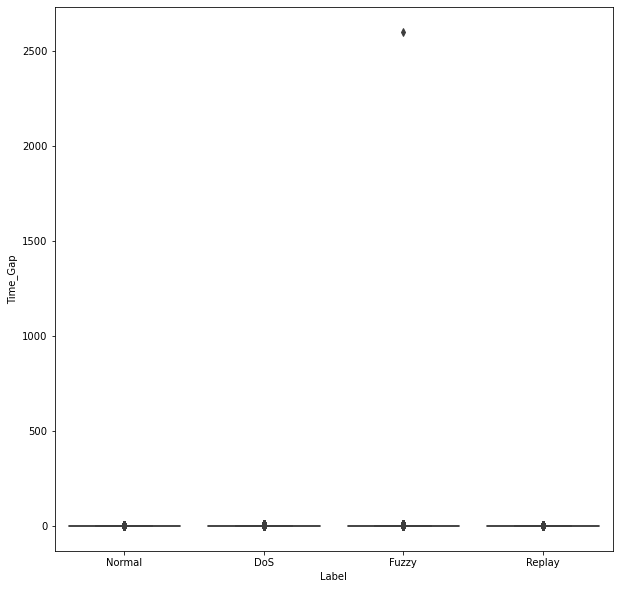

In [121]:
plt.figure(figsize=(10, 10))
sns.boxplot(x = 'Label', y="Time_Gap", data = df)

In [119]:
dt = df[df.Label == 'DoS']
dt.loc[dt.index[dt['Time_Gap'] > 10]][['Time', 'Time_Gap']]

,Time,Time_Gap
297609,123341.6,10.4
297625,123411.2,10.1
300281,125341.2,10.3
300307,125461.2,10.3
300315,125491.0,10.3
...,...,...
825072,319726.3,10.2
825084,319776.4,10.2
826488,320655.9,10.1
826496,320686.3,10.1


In [34]:
print(*(f'{name} : {len(data["ID"].unique())}\n' for name, data in df_dict.items()))

Normal : 45
 DoS : 212
 Fuzzy : 320
 Replay : 46



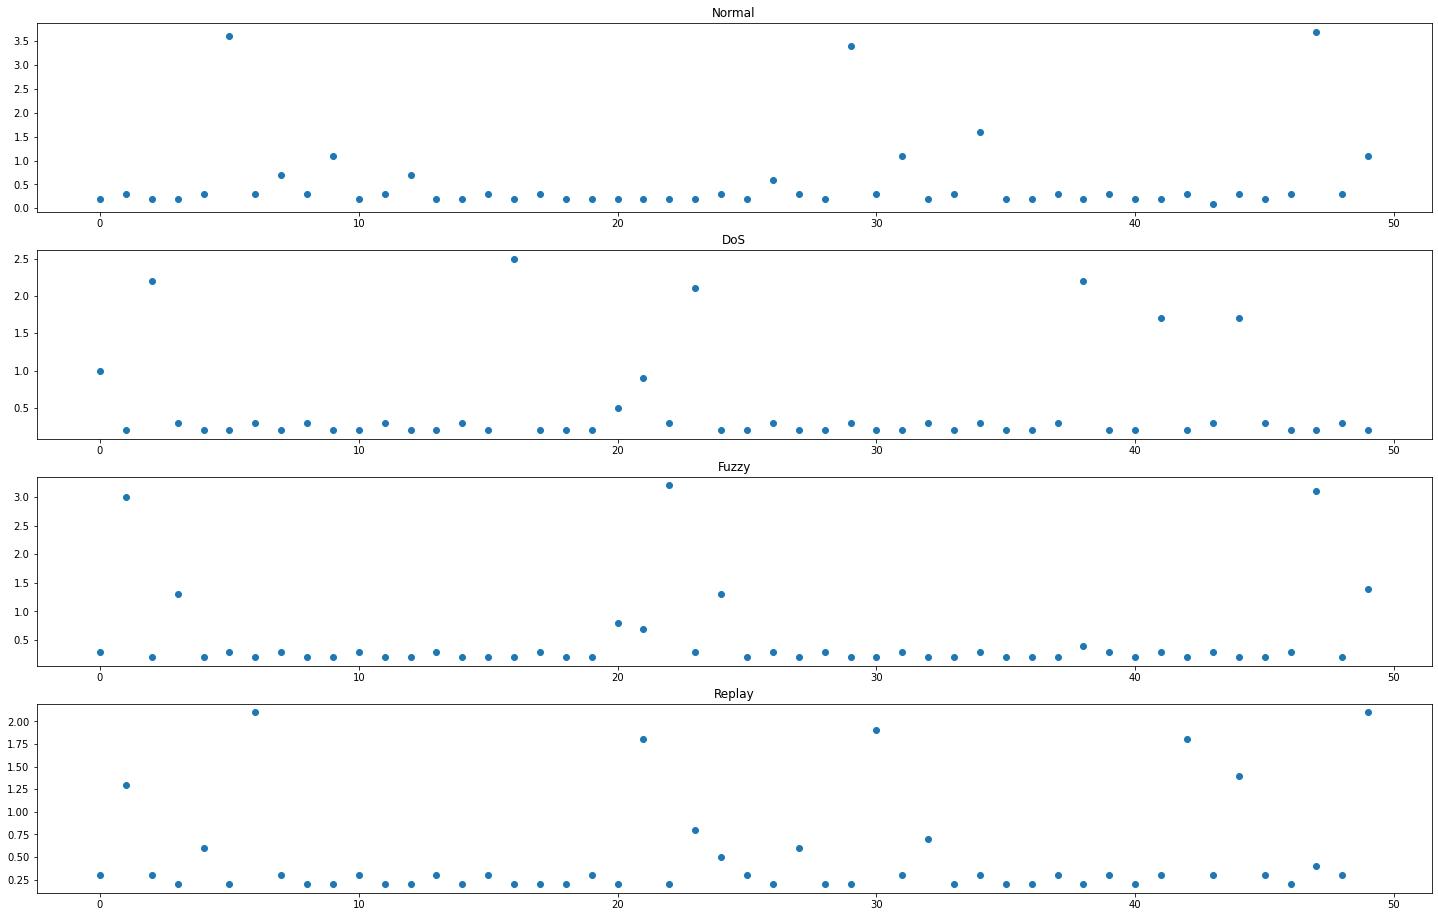

In [19]:
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(25, 16))
for i, (name, data) in enumerate(df_dict.items()):
    data = data.iloc[800000:800000+50]
    ax[i].scatter(range(len(data)), data['Time_Gap'][:])
    ax[i].set_title(name)

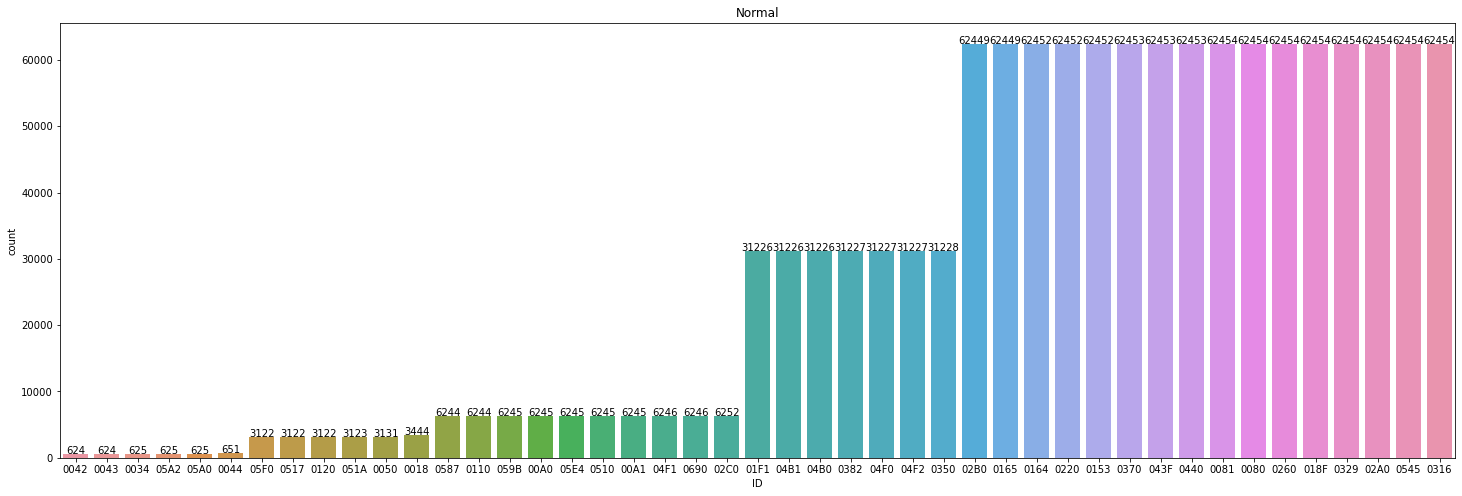

In [24]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(25, 8))
# for i, (name, data) in enumerate(df_dict.items()):
i = 0
name = 'Normal'
data = df_dict['Normal']
order = data['ID'].value_counts().sort_index().sort_values().index
sub_ax = sns.countplot(x="ID", data=data, order = order, ax=ax)
sub_ax.set_title(name)
for p in sub_ax.patches:
    sub_ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+3000), ha='center', va='top', color='black', size=10)